In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [13]:
import yfinance as yf
import pandas as pd

start = '2020-01-01'
end = '2023-12-31'

# Use yfinance to fetch data
df = yf.download('AAPL', start=start, end=end)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152657,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441444,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018707,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844337,132079200


In [15]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152657,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441444,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018707,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844337,132079200


In [17]:
df = df.drop(['Date', 'Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,74.059998,75.150002,73.797501,75.087502,135480400
1,74.287498,75.144997,74.125000,74.357498,146322800
2,73.447502,74.989998,73.187500,74.949997,118387200
3,74.959999,75.224998,74.370003,74.597504,108872000
4,74.290001,76.110001,74.290001,75.797501,132079200


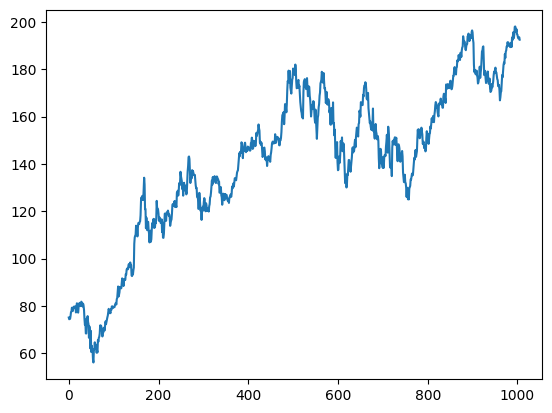

In [18]:
plt.plot(df.Close)

In [19]:
df


,Open,High,Low,Close,Volume
0,74.059998,75.150002,73.797501,75.087502,135480400
1,74.287498,75.144997,74.125000,74.357498,146322800
2,73.447502,74.989998,73.187500,74.949997,118387200
3,74.959999,75.224998,74.370003,74.597504,108872000
4,74.290001,76.110001,74.290001,75.797501,132079200
...,...,...,...,...,...
1001,195.179993,195.410004,192.970001,193.600006,37122800
1002,193.610001,193.889999,192.830002,193.050003,28919300
1003,192.490005,193.500000,191.089996,193.149994,48087700
1004,194.139999,194.660004,193.169998,193.580002,34049900


In [22]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1001    181.768301
1002    181.787101
1003    181.898701
1004    182.046001
1005    182.173301
Name: Close, Length: 1006, dtype: float64

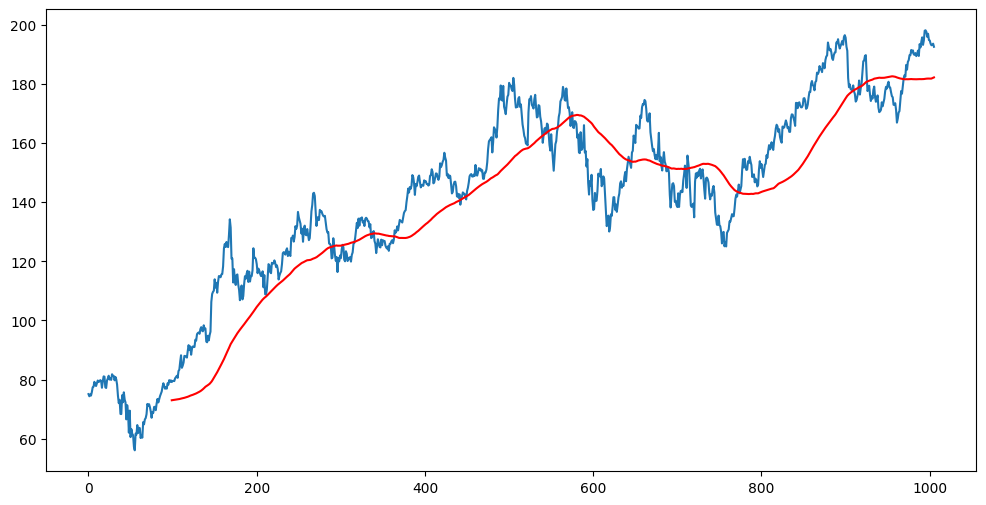

In [23]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [24]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1001    178.649100
1002    178.871851
1003    179.085250
1004    179.290201
1005    179.487900
Name: Close, Length: 1006, dtype: float64

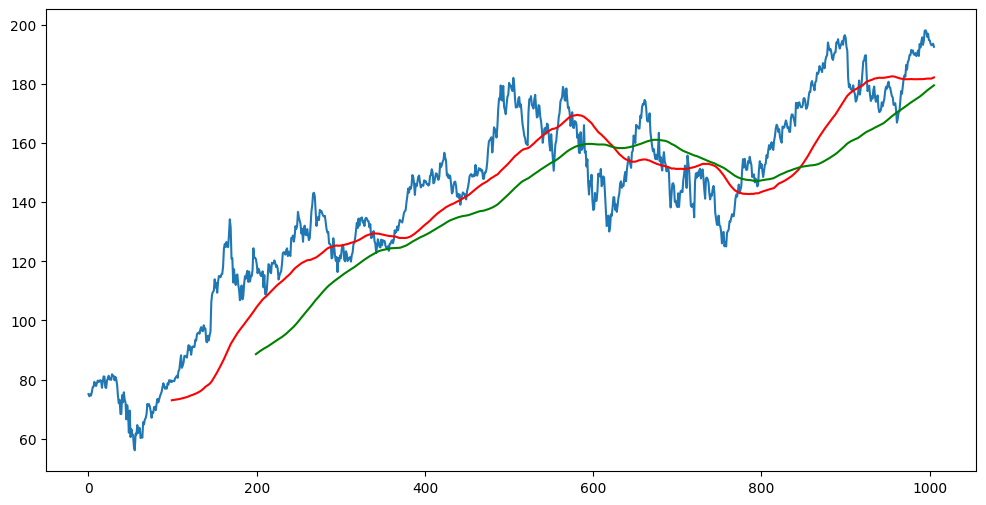

In [26]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [27]:
df.shape

(1006, 5)

In [32]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(704, 1)
(302, 1)


In [33]:
data_training.head()

,Close
0,75.087502
1,74.357498
2,74.949997
3,74.597504
4,75.797501


In [34]:
data_testing.head()

,Close
704,143.750000
705,143.860001
706,143.389999
707,147.270004
708,149.449997


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [37]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.101

In [38]:
data_training_array.shape

(704, 1)

In [41]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0] ):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#ml model start


In [43]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [50]:
 model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_9 (LSTM)               (None, 120)              

In [52]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
19/19 [==============================] - 18s 418ms/step - loss: 0.2188
Epoch 2/50
19/19 [==============================] - 8s 421ms/step - loss: 0.0361
Epoch 3/50
19/19 [==============================] - 8s 426ms/step - loss: 0.0280
Epoch 4/50
19/19 [==============================] - 8s 418ms/step - loss: 0.0195
Epoch 5/50
19/19 [==============================] - 8s 418ms/step - loss: 0.0168
Epoch 6/50
19/19 [==============================] - 8s 424ms/step - loss: 0.0169
Epoch 7/50
19/19 [==============================] - 8s 432ms/step - loss: 0.0152
Epoch 8/50
19/19 [==============================] - 8s 423ms/step - loss: 0.0155
Epoch 9/50
19/19 [==============================] - 8s 414ms/step - loss: 0.0161
Epoch 10/50
19/19 [==============================] - 8s 413ms/step - loss: 0.0147
Epoch 11/50
19/19 [==============================] - 8s 415ms/step - loss: 0.0144
Epoch 12/50
19/19 [==============================] - 8s 410ms/step - loss: 0.0145
Epoch 13/50
19/19 [=====

In [53]:
model.save('keras_model.h5')

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
model.save('my_model.keras')


In [55]:
data_testing.head()

,Close
704,143.750000
705,143.860001
706,143.389999
707,147.270004
708,149.449997


In [56]:
past_100_days = data_training.tail(100)

In [58]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [59]:
final_df.head()

,Close
0,140.520004
1,143.779999
2,149.639999
3,148.839996
4,148.710007


In [62]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.12067407e-01],
       [2.56669874e-01],
       [3.36845005e-01],
       [3.25899554e-01],
       [3.24121067e-01],
       [3.58325471e-01],
       [2.78560776e-01],
       [2.88958840e-01],
       [3.24121067e-01],
       [3.13859746e-01],
       [2.41072675e-01],
       [1.65686244e-01],
       [9.38569964e-02],
       [1.05896805e-01],
       [1.42427083e-01],
       [6.89560903e-02],
       [8.94787325e-02],
       [1.48447091e-01],
       [1.41332725e-01],
       [1.81283444e-01],
       [2.27664607e-01],
       [2.27664607e-01],
       [1.69927557e-01],
       [1.94417818e-01],
       [1.60076672e-01],
       [1.90313248e-01],
       [2.26296347e-01],
       [2.44903551e-01],
       [2.91832102e-01],
       [3.01272342e-01],
       [2.71582944e-01],
       [2.85127963e-01],
       [2.80065778e-01],
       [3.20837369e-01],
       [3.44096322e-01],
       [3.01682987e-01],
       [3.55452209e-01],
       [3.83362910e-01],
       [4.14967955e-01],
       [3.97728802e-01],


In [63]:
input_data.shape

(402, 1)

In [65]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [67]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(302, 100, 1)
(302,)


In [68]:
#making prediction

y_predicted = model.predict(x_test)

10/10 [==============================] - 2s 70ms/step


In [69]:
y_predicted.shape

(302, 1)

In [70]:
y_test

array([2.56259438e-01, 2.57764440e-01, 2.51333996e-01, 3.04419297e-01,
       3.34245437e-01, 3.73785719e-01, 3.32877386e-01, 2.70625330e-01,
       4.20303833e-01, 3.87467481e-01, 3.50663509e-01, 2.73772076e-01,
       1.89629327e-01, 1.82788446e-01, 1.90176505e-01, 1.98111952e-01,
       1.34765330e-01, 2.98946467e-01, 3.37665877e-01, 3.18237801e-01,
       3.42317626e-01, 3.25215424e-01, 3.51621332e-01, 3.59419828e-01,
       3.14543667e-01, 3.44233064e-01, 3.56410032e-01, 3.15911927e-01,
       2.62689883e-01, 2.20960469e-01, 3.14817361e-01, 3.18648237e-01,
       3.11807356e-01, 2.95662978e-01, 2.44766809e-01, 2.17813722e-01,
       2.41209417e-01, 2.34505488e-01, 2.66384017e-01, 2.79792085e-01,
       2.48871379e-01, 1.57066668e-01, 1.29839887e-01, 1.00560926e-01,
       9.96033112e-02, 1.42700776e-01, 9.86454877e-02, 9.35833027e-02,
       6.85456542e-02, 1.39554552e-02, 6.27993394e-02, 6.71773945e-02,
       6.84129827e-04, 1.83336146e-02, 0.00000000e+00, 6.29360819e-02,
      

In [71]:
y_predicted

array([[0.40304762],
       [0.3978292 ],
       [0.39233908],
       [0.3867342 ],
       [0.3811816 ],
       [0.37585637],
       [0.3709445 ],
       [0.36659068],
       [0.3628503 ],
       [0.35983196],
       [0.35763288],
       [0.3562992 ],
       [0.3557683 ],
       [0.3558733 ],
       [0.35639971],
       [0.35712472],
       [0.35784897],
       [0.35837543],
       [0.35862476],
       [0.35861516],
       [0.35840884],
       [0.35810316],
       [0.35779506],
       [0.35759133],
       [0.357602  ],
       [0.3578956 ],
       [0.35854727],
       [0.35964996],
       [0.3612488 ],
       [0.36329558],
       [0.36566013],
       [0.36825013],
       [0.37100688],
       [0.37389418],
       [0.37687266],
       [0.3798276 ],
       [0.3825862 ],
       [0.3849997 ],
       [0.38693655],
       [0.3883291 ],
       [0.38916725],
       [0.38946235],
       [0.3891658 ],
       [0.38818213],
       [0.38645148],
       [0.38393652],
       [0.38064614],
       [0.376

In [72]:
scaler.scale_

array([0.01368176])

In [73]:
scale_factor = 1/0.01368176
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

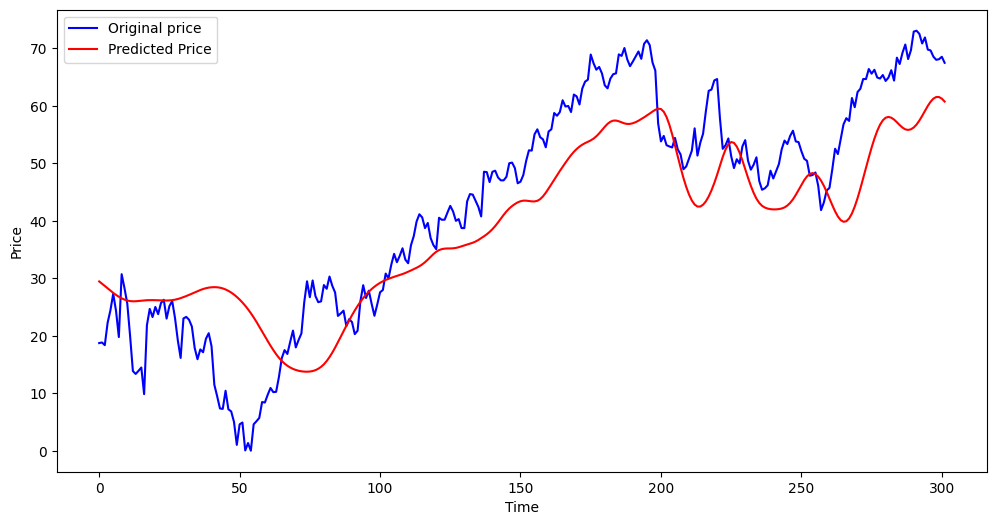

In [75]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original price')
plt.plot(y_predicted, 'r' ,label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show